In [1]:
%matplotlib inline

In [2]:
#-------------------------------------------------------------------------------------------------------------------------------
# By Alexandra Lee (August 2018) 
#
# Plot heatmap of gene expression data as environment change from high to low oxygen levels
#
# Dataset: Pseudomonas aeruginosa gene expression compendium referenced in https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5069748/
# 
# Use map_file to select only those samples from the oxygen level experiment
# 
#-------------------------------------------------------------------------------------------------------------------------------
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


randomState = 123
from numpy.random import seed
seed(randomState)

In [3]:
# load arguments
data_file = os.path.join(os.path.dirname(os.getcwd()), "data", "all-pseudomonas-gene-normalized.zip")  # repo file is zipped
map_file = os.path.join(os.path.dirname(os.getcwd()), "metadata", "mapping_oxy.txt")

PA1673like_file = os.path.join(os.path.dirname(os.getcwd()), "output", "PA1673_like_genes_v1.txt")

In [4]:
# read in data
data = pd.read_table(data_file, header=0, sep='\t', index_col=0, compression='zip')
X = data.transpose()
X.head(5)

Gene_symbol,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5561,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570
0.1_12hr_CSV86(Pae_G1a).CEL,0.472897,0.396658,0.253776,0.000000,0.175640,0.554385,0.411370,0.382222,0.310144,0.642522,...,0.358597,0.390048,0.457406,0.684082,0.338351,0.608325,0.643496,0.276075,0.112773,0.145170
0.1_2hr_CSV86(Pae_G1a).CEL,0.262346,0.086216,0.359853,0.439214,0.269749,0.768433,0.212505,0.062043,0.567695,0.467073,...,0.358504,0.414206,0.389879,0.477693,0.000000,0.479385,0.154471,0.140891,0.167505,0.157060
0.1_6hr_CSV86(Pae_G1a).CEL,0.473658,0.244862,0.330750,0.097697,0.387226,0.328319,0.228820,0.330039,0.318081,0.512864,...,0.180744,0.380741,0.173501,0.251571,0.182793,0.528301,0.504985,0.499782,0.061106,0.365612
0.1_7hr_CSV86(Pae_G1a).CEL,0.439273,0.343402,0.192698,0.274677,0.628979,0.553796,0.431391,0.363480,0.385721,0.094584,...,0.346837,0.153927,0.067349,0.319723,0.282442,0.490655,0.531415,0.153880,0.132333,0.260087
0.1_9hr_CSV86(Pae_G1a).CEL,0.220827,0.145525,0.437803,0.293201,0.635120,0.462893,0.488733,0.309584,0.318646,0.591914,...,0.237726,0.301945,0.070222,0.513605,0.114277,0.360259,0.386868,0.223995,0.105343,0.102088


In [5]:
# read in metadata file containing sample ids for dataset to consider (i.e. oxygen level experiment: E-GEOD-52445)
grp = pd.read_table(map_file, header=0, sep='\t', index_col=None)
grp

,Experiment ID,Sample ID,Phenotype,Group
0,E-GEOD-52445,GSM1267086_HZI1981_G1a.CEL,maxO2,Train
1,E-GEOD-52445,GSM1267087_HZI1950_Pae_G1a.CEL,t5,Test
2,E-GEOD-52445,GSM1267088_HZI1951_Pae_G1a.CEL,t10,Test
3,E-GEOD-52445,GSM1267089_HZI1952_Pae_G1a.CEL,t15,Test
4,E-GEOD-52445,GSM1267090_HZI1953a_Pae_G1a.CEL,t20,Test
5,E-GEOD-52445,GSM1267091_HZI1954_Pae_G1a.CEL,t25,Test
6,E-GEOD-52445,GSM1267092_HZI1955_Pae_G1a.CEL,t30,Test
7,E-GEOD-52445,GSM1267093_HZI1956_Pae_G1a.CEL,t35,Test
8,E-GEOD-52445,GSM1267094_HZI1958_Pae_G1a.CEL,t40,Test
9,E-GEOD-52445,GSM1267095_HZI1959_Pae_G1a.CEL,t50,Test


In [6]:
# select only those rows the experiment under focus
# ordering based on timecourse experiment (high oxygen --> low oxygen)

timeline = ['maxO2', 't5', 't10', 't15', 't20', 't25', 't30', 't35', 't40', 't50', 't60', 't70', 't80', 'minO2']
dataset = pd.DataFrame()

for index, row in grp.iterrows():
    if row['Phenotype'] == timeline[index]:
        sample = str(row['Sample ID'])
        dataset = dataset.append(X[X.index.str.contains(sample, regex=False)])
        
dataset = dataset.T
dataset.shape

(5549, 14)

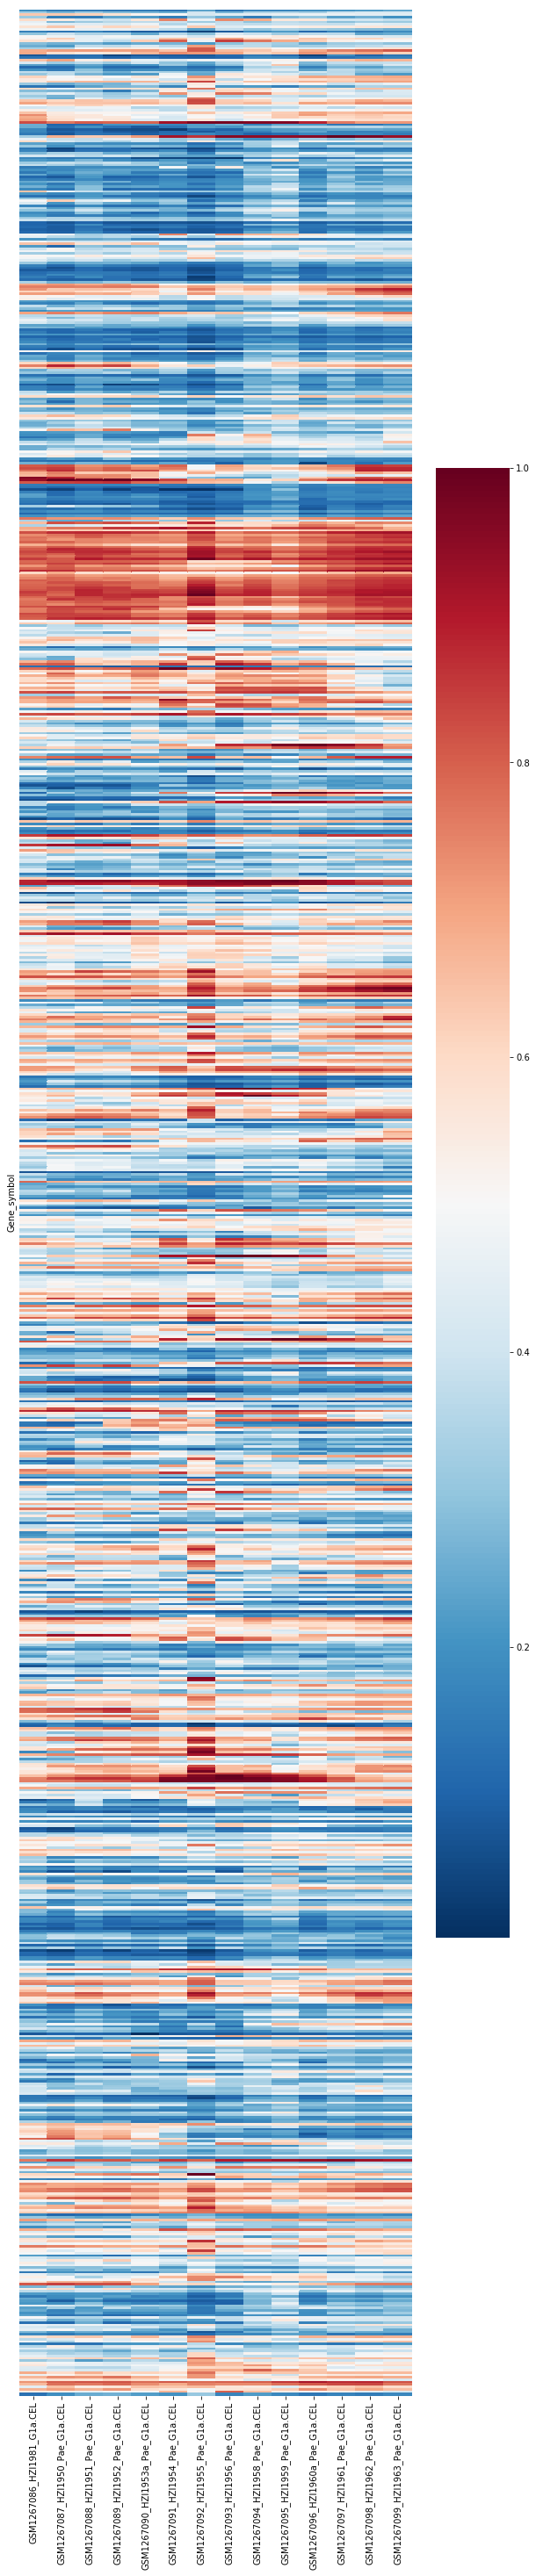

In [7]:
# Heat map of all genes
plt.figure(figsize=(10, 50))
sns.heatmap(dataset[4000:5000], yticklabels=False, cmap="RdBu_r", annot=False)
#sns.clustermap(dataset)

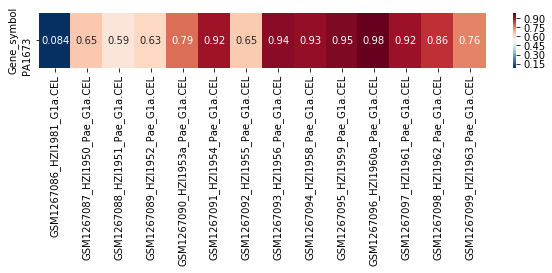

In [8]:
# Heat map of gene PA1673 (known to be solely regulated by Anr TF so expect it should be 
# linearly turned on as Anr turns on when oxygen levels decrease)
#sns.heatmap(dataset['PA1673'], annot=True)
plt.figure(figsize=(10, 1))
PA1673_exp = dataset[dataset.index == 'PA1673']
sns.heatmap(PA1673_exp, annot = True, cmap = "RdBu_r")

In [9]:
# Use pearson correlation score to compare PA1673 profile with all other genes
# Select genes that have the highest 95% person correlation score as being "PA1673-like"

corr_score = []
ref_gene = np.reshape(PA1673_exp.values, (PA1673_exp.shape[1],))
for i in range(0,dataset.shape[0]):
    corr_score.append(pearsonr(ref_gene, dataset.iloc[i].values))
corr_score_df = pd.DataFrame(corr_score, index=dataset.index, columns=['Pearson', 'Pvalue'])

In [10]:
# Select only those genes that exceed 95% quantile (i.e. PA1673-like)
threshold = corr_score_df.Pearson.quantile(q = 0.95)
PA1673_like_genes = corr_score_df.query("Pearson >= @threshold")

# control: check that PA1673 gene is in selected subset
assert("PA1673" in PA1673_like_genes.index)

type(PA1673_like_genes)
PA1673_like_genes.to_csv(PA1673like_file, sep='\t')


pandas.core.frame.DataFrame

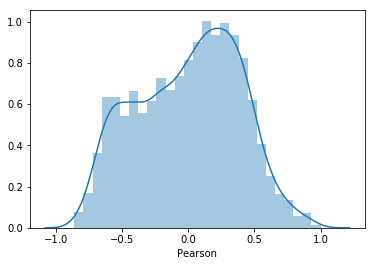

In [11]:
sns.distplot(corr_score_df.Pearson)